In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as pex
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import calmap
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [2]:
disney_plus = pd.read_csv('Resources/disney_plus_shows.csv')

disney_plus.head()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"281,399"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"96,739"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,299"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,164"


In [3]:
disney_plus.shape

(954, 19)

In [4]:
disney_df = disney_plus[['title','type','rated','added_at', 'genre','director','actors','country']]

disney_df.head()

,title,type,rated,added_at,genre,director,actors,country
0,10 Things I Hate About You,movie,PG-13,"November 12, 2019","Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",USA
1,101 Dalmatian Street,series,NaN,"February 28, 2020","Animation, Comedy, Family",NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...","UK, USA, Canada"
2,101 Dalmatians,movie,G,"November 12, 2019","Adventure, Comedy, Crime, Family",Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...","USA, UK"
3,101 Dalmatians 2: Patch's London Adventure,movie,G,"November 12, 2019","Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",USA
4,102 Dalmatians,movie,G,"November 12, 2019","Adventure, Comedy, Family",Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...","USA, UK"


In [5]:
disney_df['added_at'] = pd.to_datetime(disney_df['added_at'])

disney_df.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,title,type,rated,added_at,genre,director,actors,country
0,10 Things I Hate About You,movie,PG-13,2019-11-12,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",USA
1,101 Dalmatian Street,series,NaN,2020-02-28,"Animation, Comedy, Family",NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...","UK, USA, Canada"
2,101 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Crime, Family",Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...","USA, UK"
3,101 Dalmatians 2: Patch's London Adventure,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",USA
4,102 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Family",Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...","USA, UK"


In [6]:
disney_df.isnull().sum()

title        84
type         84
rated       235
added_at      0
genre        94
director    286
actors      109
country     108
dtype: int64

In [7]:
disney_df.shape

(954, 8)

In [8]:
disney_df = disney_df.dropna(subset=['director', 'actors','country'], how='any')
disney_df.shape

(643, 8)

In [9]:
disney_df.isnull().sum()

title        0
type         0
rated       65
added_at     0
genre        2
director     0
actors       0
country      0
dtype: int64

In [10]:
disney_df.dtypes

title               object
type                object
rated               object
added_at    datetime64[ns]
genre               object
director            object
actors              object
country             object
dtype: object

In [11]:
disney_df = disney_df.rename(columns={'type':'show_type',
                                     'rated': 'film_rating',
                                     'actors':'cast'})

disney_df

,title,show_type,film_rating,added_at,genre,director,cast,country
0,10 Things I Hate About You,movie,PG-13,2019-11-12,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",USA
2,101 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Crime, Family",Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...","USA, UK"
3,101 Dalmatians 2: Patch's London Adventure,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",USA
4,102 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Family",Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...","USA, UK"
5,12 Dates of Christmas,movie,PG,2019-11-12,"Comedy, Fantasy, Romance",James Hayman,"Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",USA
6,"20,000 Leagues Under the Sea",movie,G,2019-11-12,"Adventure, Drama, Family, Fantasy, Sci-Fi",Richard Fleischer,"Kirk Douglas, James Mason, Paul Lukas, Peter L...",USA
7,A Bug's Life,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family","John Lasseter, Andrew Stanton(co-director)","Dave Foley, Kevin Spacey, Julia Louis-Dreyfus,...",USA
9,A Goofy Movie,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Musical,...",Kevin Lima,"Bill Farmer, Jason Marsden, Jim Cummings, Kell...","USA, Australia, France, Canada"
10,A Kid in King Arthur's Court,movie,PG,2019-11-12,"Adventure, Comedy, Family, Fantasy, Romance",Michael Gottlieb,"Thomas Ian Nicholas, Joss Ackland, Art Malik, ...","USA, Hungary, UK"
11,A Knight for a Day,movie,APPROVED,2019-11-12,"Animation, Short, Comedy",Jack Hannah,Pinto Colvig,USA


In [12]:
disney_df['month_added'] = pd.DatetimeIndex(disney_df['added_at']).month
disney_df['day_added'] = pd.DatetimeIndex(disney_df['added_at']).day
disney_df['year_added'] = pd.DatetimeIndex(disney_df['added_at']).year

disney_df.head()

,title,show_type,film_rating,added_at,genre,director,cast,country,month_added,day_added,year_added
0,10 Things I Hate About You,movie,PG-13,2019-11-12,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",USA,11,12,2019
2,101 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Crime, Family",Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...","USA, UK",11,12,2019
3,101 Dalmatians 2: Patch's London Adventure,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",USA,11,12,2019
4,102 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Family",Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...","USA, UK",11,12,2019
5,12 Dates of Christmas,movie,PG,2019-11-12,"Comedy, Fantasy, Romance",James Hayman,"Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",USA,11,12,2019


In [13]:
disney_df_copy = disney_df.copy()

disney_df_copy.dtypes

title                  object
show_type              object
film_rating            object
added_at       datetime64[ns]
genre                  object
director               object
cast                   object
country                object
month_added             int64
day_added               int64
year_added              int64
dtype: object

In [98]:
dy_show_type = disney_df_copy['show_type'].value_counts()
dy_show_type 

movie      635
episode      8
Name: show_type, dtype: int64

In [101]:
dy_show_type = disney_plus['type'].value_counts().reset_index()

dy_show_type = dy_show_type.rename(columns={'index':'show_type',
                                           'type': 'Count'})
dy_show_type

pie_chart = go.Pie(labels=dy_show_type['show_type'], values=dy_show_type['Count'],
                   pull=[0.05,0],
                   marker = dict(colors=["#6ad49b", "#1f77b4"]))

fig_layout = go.Layout(title=" Distribution of Show Types on Disney +", height = 400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data= pie_chart, layout=fig_layout)
iplot(fig)


In [102]:
#Created a dict to change the numerics months to strings so easier to read on graph 
months = {'1': 'January', '2':'February', '3':'March','4':'April','10':'October', '11':'November','12':'December'}

#Change the date time month_released_on_nf column to string 
disney_df_copy['month_added'] = disney_df_copy['month_added'].astype(str)
disney_df_copy = disney_df_copy.replace({'month_added': months})

disney_df_copy.head()

,title,show_type,film_rating,added_at,genre,director,cast,country,month_added,day_added,year_added
0,10 Things I Hate About You,movie,PG-13,2019-11-12,"Comedy, Drama, Romance",Gil Junger,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",USA,November,12,2019
2,101 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Crime, Family",Stephen Herek,"Glenn Close, Jeff Daniels, Joely Richardson, J...","USA, UK",November,12,2019
3,101 Dalmatians 2: Patch's London Adventure,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Barry Bostwick, Jason Alexander, Martin Short,...",USA,November,12,2019
4,102 Dalmatians,movie,G,2019-11-12,"Adventure, Comedy, Family",Kevin Lima,"Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...","USA, UK",November,12,2019
5,12 Dates of Christmas,movie,PG,2019-11-12,"Comedy, Fantasy, Romance",James Hayman,"Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",USA,November,12,2019


In [103]:
month_releases = disney_df_copy['month_added'].value_counts().reset_index()
month_releases = month_releases.rename(columns = {'index':'Month','month_added':'Count'})

# month_releases
bar_graph = go.Bar(x=month_releases['Month'],y=month_releases['Count'], name="Number of Content Added", marker=dict(color="#5A89D1"))
data = [bar_graph]
layout = go.Layout(title="Number of content released by month", legend =dict(x=0.1, y=1.1))
fig =go.Figure(data,layout=layout)
fig.show()

Disney + officially launched in the United States on November 12, 2019. This explains the intial surge in content added. 

In [105]:
disney_plus['original_release_year'] = disney_plus['released_at'].str.split(" ").apply(lambda x:x[-1])

disney_plus.head()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes,original_release_year
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"281,399",1999
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124,2019
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"96,739",1996
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,299",2003
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,164",2000


In [53]:
df_tv = disney_copy[disney_copy['show_type'] == 'episode']
df_mov = disney_copy[disney_copy['show_type'] == 'movie']

df_temp_tv = df_tv['film_rating'].value_counts().reset_index()
df_mov_tv = df_mov['film_rating'].value_counts().reset_index()

trace_1 = go.Bar(
                x = df_temp_tv['index'],
                y= df_temp_tv['film_rating'],
                name= 'TV Shows',
                marker = dict(color = 'rgb(65,105,225)'))

trace_2 = go.Bar(
                x = df_mov_tv['index'],
                y= df_mov_tv['film_rating'],
                name= 'Movies',
                marker = dict(color='rgb(0,255,127)'))

layout = go.Layout(template = 'plotly_dark', title = 'Ratings of Disney+ Content',
                  xaxis=dict(title='Film Rating'), yaxis=dict(title='Count'))

fig = go.Figure(data = [trace_1, trace_2], layout = layout)
fig.show()

Disney+ is the exclusive home for your favorite movies and TV shows from Disney, Pixar, Marvel, Star Wars, and National Geographic. All these studio productions are catered to children and young teens

In [68]:
us_mov_dct = disney_copy[disney_copy ['show_type'] == 'movie'] 
us_mov_dct = us_mov_dct[us_mov_dct['country'] == 'USA']


categories = ", ".join(us_mov_dct['director'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = '#F0FFF0',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 U.S. Movie Directors by number of content on Disney+', yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [67]:
us_mov_cast = disney_copy[disney_copy['show_type'] == 'movie'] 
us_mov_df = us_mov_cast[us_mov_cast['country'] == 'USA']


categories = ", ".join(us_mov_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = '#FFF5EE',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 US Actors and Actresses by appearances on Disney+', yaxis =  dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

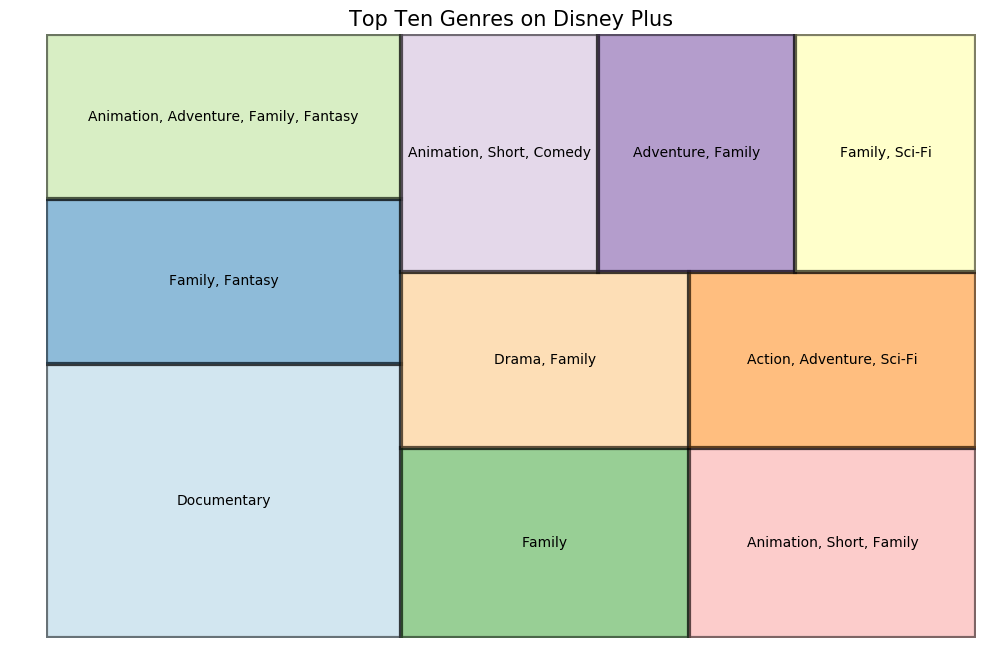

In [19]:
disney_genre = disney_df_copy['genre'].value_counts().reset_index()[:10]
disney_genre = disney_genre.rename(columns={'index': 'Genre',
                           'genre':'Count'})
disney_genre['Genre'] = disney_genre['Genre'].str.replace('Comedy, ', '')


sizes=np.array(disney_genre['Count'])
labels=disney_genre['Genre']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Top Ten Genres on Disney Plus', fontsize = 15)
plt.axis('off')
plt.show()

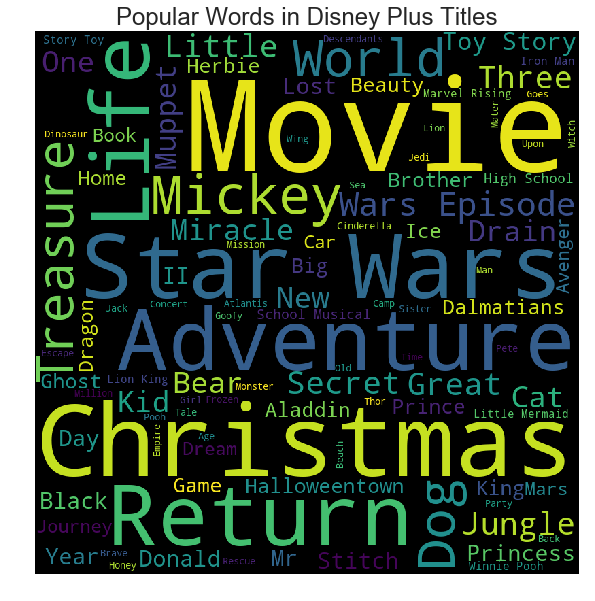

<Figure size 720x720 with 0 Axes>

In [107]:
plt.rcParams['figure.figsize'] = (10,10)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color= 'black',
                     width= 800, height=800, max_words = 100).generate(' '.join(disney_df['title']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Words in Disney Plus Titles', fontsize =24)
plt.show()

# IMDB Rating of Disney Plus Content

In [26]:
imdb_movies = pd.read_csv('Resources/IMDb movies.csv', usecols=['title', 'year', 'genre'])
imdb_rating = pd.read_csv('Resources/IMDb ratings.csv', usecols=['weighted_average_vote'])

movie_ratings = pd.DataFrame({'Title': imdb_movies.title,
                             'Release Year': imdb_movies.year,
                             'Genre': imdb_movies.genre,
                             'Rating': imdb_rating.weighted_average_vote})

# Drop the duplicate records 
movie_ratings.drop_duplicates(subset=['Title','Release Year', 'Rating'], inplace=True)
movie_ratings.dropna()

,Title,Release Year,Genre,Rating
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1
1,Den sorte drøm,1911,Drama,5.9
2,Cleopatra,1912,"Drama, History",5.2
3,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",5.7
5,Madame DuBarry,1919,"Biography, Drama, Romance",6.8
6,Quo Vadis?,1913,"Drama, History",6.2
7,Independenta Romaniei,1912,"History, War",6.7
8,Richard III,1912,Drama,5.5
9,Atlantis,1913,Drama,6.7


In [28]:
imdb_disney = movie_ratings.merge(disney_df, left_on = 'Title', right_on = 'title', how='inner')

imdb_disney= imdb_disney.sort_values('Rating', ascending=False)
imdb_disney.head()

,Title,Release Year,Genre,Rating,title,show_type,film_rating,added_at,genre,director,cast,country,month_added,day_added,year_added
186,Star Wars: Episode V - The Empire Strikes Back,1980,"Action, Adventure, Fantasy",8.7,Star Wars: Episode V - The Empire Strikes Back,movie,PG,2019-11-12,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",USA,11,12,2019
251,The Lion King,1994,"Animation, Adventure, Drama",8.5,The Lion King,movie,PG,2020-01-28,"Animation, Adventure, Drama, Family, Musical",Jon Favreau,"Chiwetel Ejiofor, John Oliver, James Earl Jone...","USA, UK",1,28,2020
418,Avengers: Endgame,2019,"Action, Adventure, Drama",8.5,Avengers: Endgame,movie,PG-13,2019-11-12,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",USA,11,12,2019
252,The Lion King,1994,"Animation, Adventure, Drama",8.5,The Lion King,movie,G,2019-11-12,"Animation, Adventure, Drama, Family, Musical","Roger Allers, Rob Minkoff","Rowan Atkinson, Matthew Broderick, Niketa Cala...",USA,11,12,2019
365,WALL·E,2008,"Animation, Adventure, Family",8.4,WALL·E,movie,G,2019-11-12,"Animation, Adventure, Family, Sci-Fi",Andrew Stanton,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",USA,11,12,2019


In [32]:
imdb_disney_cleaned = imdb_disney.drop_duplicates(['Title'], keep='last')
imdb_disney_cleaned['Genre'] = imdb_disney_cleaned['Genre'].str.split(",").apply(lambda x:x[0])

imdb_disney_cleaned.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Title,Release Year,Genre,Rating,title,show_type,film_rating,added_at,genre,director,cast,country,month_added,day_added,year_added
186,Star Wars: Episode V - The Empire Strikes Back,1980,Action,8.7,Star Wars: Episode V - The Empire Strikes Back,movie,PG,2019-11-12,"Action, Adventure, Fantasy, Sci-Fi",Irvin Kershner,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",USA,11,12,2019
418,Avengers: Endgame,2019,Action,8.5,Avengers: Endgame,movie,PG-13,2019-11-12,"Action, Adventure, Drama, Sci-Fi","Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",USA,11,12,2019
365,WALL·E,2008,Animation,8.4,WALL·E,movie,G,2019-11-12,"Animation, Adventure, Family, Sci-Fi",Andrew Stanton,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi...",USA,11,12,2019
350,Toy Story 3,2010,Animation,8.3,Toy Story 3,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Fantasy",Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",USA,11,12,2019
264,Toy Story,1995,Animation,8.3,Toy Story,movie,G,2019-11-12,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,11,12,2019


In [36]:
top_rated_disney =imdb_disney_cleaned[:10]
fig = plt.figure(figsize=(15,15))
fig = pex.sunburst(top_rated_disney, path=['Title'], values='Rating', color='Rating', color_continuous_scale='RdBu')
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [116]:
for i in range(1,100): 
    string=''
    if i % 3 == 0 and i % 5 ==0:
        print("Fizzbuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
Fizzbuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
Fizzbuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
Fizzbuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
Fizzbuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
Fizzbuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
Fizzbuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz


In [ ]:
sentence = input("Please enter your sentence here: ")